**Bocheng Dai, Chen Cao, Yifan Geng**

**bd367687@stanford.edu, chencao@stanford.edu, yifangen@stanford.edu**

# Introduction {-}

Welcome to MS&E 244: Statistical Arbitrage - Homework 3.

This assignment is due by February 3rd, 2026 at 11:59pm Pacific Time and should be done in groups of 2-3 people. We recommend collaborating via a private GitHub repo.

Instructions for this assignment are below. **Please read all instructions carefully.**

1. Replace "Your Name(s) Here" above in bold with your name, and, if working in a group, your group members' names.
2. Read and run the instructions code in the Setup section. Make sure you understand what it does.
3. Answer the questions in the sections below. Make sure to limit code output to a reasonable length so that the resulting PDF you'll make from this notebook is readable. If the resulting PDF is not readable, keep your lines of code less than 80 characters.
4. Once finished, export or convert the notebook to PDF, using any method you like. For example, you can use the File -> Save and Export Notebook As -> PDF option in Jupyter Lab, you can use the [nbconvert](https://nbconvert.readthedocs.io/en/latest/) command line tool, etc. Whatever displays best is fine. Make sure no code is cut off in the PDF and that sheets are 8.5x11 inch dimensions or similar.
5. Submit the resulting PDF to the Gradescope assignment. If working in a group, only one person needs to submit and select all group members on Gradescope.
6. Zip and submit all files (your .ipynb file and any .py files we provided or you created) to the Canvas assignment. If working in a group, only one member of the group needs to submit to Canvas. Unlike Gradescope, no group members need to be selected on Canvas.

# Setup  {-}

**System Requirements**

First, ensure you have the proper system requirements:

1. We will only support Mac or Linux in this course. If you're on Windows, learn to use [WSL 2.0](https://learn.microsoft.com/en-us/windows/wsl/install) to run Linux on Windows, and then run these commands via WSL.
2. Ensure you have Python 3.10 and pip installed. You also need something to run this Jupyter notebook, whether that's Jupyter Notebook, Jupyter Lab, an IDE like VS Code, or Google Colab. We recommend collaborating via GitHub and using Jupyter Lab or VS Code to complete this notebook. 

**Jupyter Lab**

To use Jupyter Lab, we'll need to set up the Python virtual environment and install the requirements. We've provided example instructions for doing so below for those using Jupyter Lab. Note that you may need to substitute `pip` with `pip3` depending on your installation. You can learn more by reading the [venv docs](https://docs.python.org/3/library/venv.html) and the [ipykernel docs](https://ipython.readthedocs.io/en/stable/install/kernel_install.html). See documentation for [Jupyter Lab](https://jupyterlab.readthedocs.io/en/latest/) if needed.

```bash
# Navigate to the root directory containing your course files
cd /path/to/mse244

# Place the requirements.txt file in this directory if it isn't already there
# Put this .ipynb file in this directory or in a subdirectory, e.g. "hw1"

# Create a virtual environment
python3.10 -m venv .venv

# Activate the virtual environment
source .venv/bin/activate

# Install the required packages
pip install -r requirements.txt

# Add the virtual environment to Jupyter
python -m ipykernel install --user --name mse244 --display-name="MSE244"

# Start Jupyter Lab
jupyter lab

# Once in Jupyter, make sure to select the "MSE244" kernel 
```

**VS Code**

If using VS Code, read the docs for [Jupyter notebooks in VS Code](https://code.visualstudio.com/docs/datascience/jupyter-notebooks) and [virtual environments in VS Code](https://code.visualstudio.com/docs/python/environments). VS Code can help you create and activate a virtual environment and Jupyter kernel for this notebook through its GUI (though you should also learn how to do these things via the command line). Make sure that you use Python 3.10 to create your virtual environment.


Once setup is complete and you're running within your environment, you can begin executing the cells below.

# Imports {-}

In [7]:
%load_ext autoreload
%autoreload 2

import warnings
from datetime import datetime
from typing import Any, Dict, Optional, Tuple, Union

import arch.unitroot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mpl_ticker
import seaborn as sns
import scipy as sp
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf

# We add any local imports (Python files we've written) here
from factor_models import (
    load_data,
    select_asset_universe,
)


# Configure pandas display options
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 40)
pd.set_option('display.precision', 4)

# Data {-}

To start with, we'll load the supplied Japanese equity data, preprocess the data, and set up the necessary variables.

Please make sure to look up and learn about any lines you don't understand by reading the [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html). This is essential knowledge for anyone working with financial data in Python.


Price df shape at load: (4235, 226)
Price df shape after slicing time axis: (3447, 226)
Price df shape after removing future asset columns: (3447, 224)

Prices head:


,1332.T,1605.T,1721.T,1801.T,1802.T,1803.T,1808.T,1812.T,1925.T,1928.T,...,9503.T,9531.T,9532.T,9602.T,9613.T,9735.T,9766.T,9843.T,9983.T,9984.T
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-04,514.1772,1640.3337,906.6639,1236.6694,523.9589,456.3690,1560.3464,682.8918,1352.8394,1015.7311,...,2240.7510,2253.5034,1583.7520,1837.3094,946.7017,4466.2446,2745.0986,2307.3474,3180.9983,1098.4468
2007-01-05,535.0902,1598.5864,909.3971,1226.7228,513.8568,450.3043,1542.5345,677.7186,1339.8625,1005.1937,...,2172.8496,2222.2046,1548.7904,1841.5720,956.0132,4409.3506,2601.4155,2232.3472,3203.0117,1120.9558
2007-01-09,524.2733,1614.2418,925.7949,1256.5621,520.5914,460.9175,1538.9718,695.8253,1372.3043,1015.7311,...,2179.6396,2194.3833,1611.7211,1858.6237,977.7407,4508.9165,2586.2905,2214.6997,3167.2395,1114.2031
2007-01-10,506.2446,1581.1916,913.4961,1246.6157,511.8364,466.2240,1535.4095,691.9454,1356.0836,1006.3643,...,2138.8989,2159.6069,1566.2709,1841.5720,957.5651,4430.6855,2510.6685,2342.6404,3101.1982,1118.7048
2007-01-11,504.0811,1589.8885,910.7634,1249.9312,511.8364,479.8697,1567.4717,699.7054,1330.1299,1010.4626,...,2138.8989,2145.6963,1569.7675,1854.3606,945.1494,4380.9028,2525.7932,2347.0520,3057.1704,1118.7048



Metadata head:


Ticker,Industry,Sector,Company
1332.T,Fishery,Consumer Goods,NISSUI.CORP.
1605.T,Mining,Materials,INPEX.CORP.
1721.T,Construction,Capital Goods/Others,COMSYS.HOLDINGS.CORP.
1801.T,Construction,Capital Goods/Others,TAISEI.CORP.
1802.T,Construction,Capital Goods/Others,OBAYASHI.CORP.


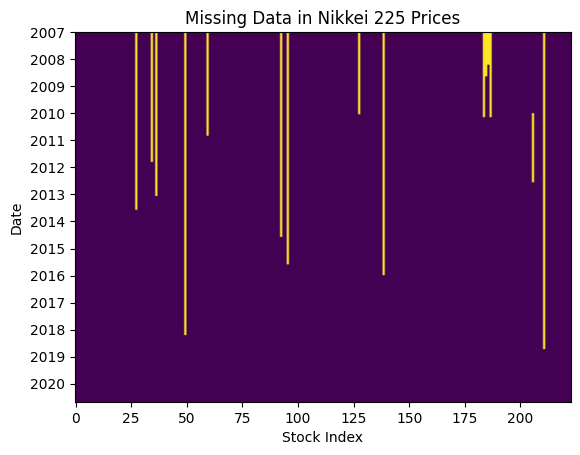

In [10]:
config = {
    'NIKKEI_CSV_PATH': 'N225.csv',
    'END_YEAR': 2020,
}

prices, returns, tickers, metadata = load_data(config, verbose=True)

# Outline {-}

In this homework, we'll explore how factor models used in statistical arbitrage are defined, 
estimated, and analyzed. The lessons from this homework will be used in the next homework
as part of the strategy from Avellaneda & Lee paper on statistical arbitrage. The analysis
here will be on in-sample data, but we'll consider out-of-sample data in the next homework.

In the paper, the authors design, backtest, and analyze a statistical arbitrage strategy which 
generalizes pairs trading. The strategy is based on the idea that the statistical noises (i.e. 
the residuals) which remain after modeling a cross-section of stock prices with a factor model 
are on average mean-reverting and weakly dependent at most times.

In this homework, we'll focus on the types of factor models utilized in the paper. We'll learn about two 
types of factors: statistical factors which we'll use PCA to extract from stock prices, and sector 
factors (a type of fundamental factor) which we'll also extract from stock prices. 

For both of these tasks, we'll use the stocks of Japanese equities in the Nikkei 225 index, which is 
similar to the S&P 500 for Japan. We'll also use a more modern time period than Avellaneda & Lee.

Here's an outline of what you'll do in this homework:

1. Establish a few short mathematical results for using fundamental factor models in statistical arbitrage.
2. Complete code to implement the estimation procedure for a sector factor model.
3. Establish a few short mathematical results about PCA.
4. Complete code to implement the estimation procedure for a statistical factor model using PCA.
5. Compute some factors and residuals for the sector and PCA factor models and analyze a few things.
6. Compare the residuals from the factor models and test a few things.

Throughout the homework, feel free to make any modifications to the code or models which you think would
improve their out-of-sample behavior. 

You can also use any additional data, packages, or tools which you think will be helpful.

# Factor Model Review {-}

## Introduction {-}

In Gatev et al., the authors form two-asset residuals by looking for pairs of assets which were close in normalized price. They do this to find residuals which are mean-reverting.

In Avellaneda & Lee, we will instead use a factor model to form multi-asset residuals. Using a factor model is a more general approach which allows us to form residuals for more than two assets without performing a combinatorial search. The factor model is a linear regression model that explains the returns of each asset as a linear combination of factors. The residuals are the difference between the actual returns and the returns predicted by the model. The factors are typically chosen to be common to all assets, such as the return of all assets in the market, or the return on a portfolio of assets. The residuals are then traded on the assumption that they are mean-reverting.

In the following questions, you will write code to build a factor model for the Nikkei 225 stocks. You will then write code to form the residuals from the factor model. The residuals are the difference between the actual returns and the returns predicted by the model.

## Definition {-}

We will use the following basic notation, with more defined below:

- $R \in \mathbb{R}^{T\times N}$ is the matrix of returns, where $R_{t,n}$ is the return of asset $n$ at time $t$.
- $F \in \mathbb{R}^{T\times K}$ is the matrix of factor returns, where $F_{t,k}$ is the return of factor $k$ at time $t$.
- $\beta \in \mathbb{R}^{T\times K\times N}$ is the tensor of factor betas (sometimes called factor loadings, or factor exposures), where $\beta_{t,k,n}$ is the factor beta of asset $n$ to factor $k$ at time $t$.
- $\alpha \in \mathbb{R}^{T \times N}$ is the matrix of alphas, where $\alpha_{t,n}$ is the alpha of asset $n$ at time $t$.
- $\epsilon \in \mathbb{R}^{T\times N}$ is the matrix of residuals, where $\epsilon_{t,n}$ is the residual return of asset $n$ at time $t$.
- $T$ is the number of time periods.
- $N$ is the number of assets.
- $K$ is the number of factors.

The factor model posits a model for returns which is given by the following expression:

$$
R_{t,n} = \alpha_{t,n} + F_t \beta_{t,n} + \epsilon_{t,n}
$$

Here we will refer to $\alpha_{t,n} \in \mathbb{R}$ as the *intrinsic component*, $F_t \beta_{t,n} \in \mathbb{R}$ as the *systematic component* (with $F_t \in \mathbb{R}^{1 \times K}$ and $\beta_{t,n} \in \mathbb{R}^{K \times 1}$), and $\epsilon_{t,n} \in \mathbb{R}$ as the *idiosyncratic component*. The idiosyncratic component is sometimes referred to as the specific component or the idiosyncratic error. Various statistical assumptions can be made about each of these components, and about the loadings and factors as well. These assumptions result in various consequences for statistical inference performed with factor models, and there's a vast econometric literature which covers these topics. However, in this homework (and generally in this class as well), we will not concern ourselves with them, as factor models exist in stat arb primarily as a tool to build residuals. 

Something to note is that we have written *time-varying* loadings in this definition: the term $\beta$ has a $t$ index. This is a generalization of the classic factor model definition which allows for the factor betas to change over time. This is a common feature of factor models in practice, and the one which we will use in this homework. The static loadings case, which may be more familiar, is a special case of this model where the factor betas are constant over time. 

You might also notice that this may be slightly different from the definition we've established in class: factor models are classically written with all of the variables we've defined here roughly transposed (and potentially with some axes permuted); this equation looks like $R_{n,t} = \alpha_{n,t} + \beta_{n,t}^\top F_t + \epsilon_{n,t}$ or $R_{n,t} = \alpha_{n,t} + \beta_{n,t} F_t + \epsilon_{n,t}$, depending on how one organizes the betas. However, this equation does not put the time axis as the first axis, which can be a bit unintuitive for those implementing these models in code for the first time. In implementation, some of these variables would generally be permuted or have their axes transposed. Some bugs are then invariably found when some axes are not aligned correctly, which we'd rather save you from experiencing.

## Uses of Factor Models {-}

Factor models have a variety of applications in finance, across both academia and industry. These applications generally skew towards either performing statistical inference, or making predictions, though some cases blend the two.

**Asset pricing tests.** In academia, factor models have been used to test various asset pricing models. These tests put various economic or statistical assumptions on the meaning of the factors and their behavior and posit various relationships to hold in reality. In this literature, each of the components above (including the intercept, $\alpha$) are generally studied and utilized in some way. Asset pricing tests are mostly not of interest for statistical arbitrage, so we won't expound on it. This is an inferential task.

**Performance decomposition.** In industry, factor models are very widely used to decompose the variation in returns of investment managers or funds, thereby explaining how much edge they have. In this use case, two types of factors (corresponding to the fundamental factors below) are generally used: style factors and industry factors. Style factors roughly proxy for well-known investment strategies, such as investing in stocks which have low prices as compared to the value of their business (the "value" factor) or investing in stocks which have increased in price recently (the "momentum" factor). Industry factors simply measure industry indices of performance. A general "market factor" capturing the performance of most stocks (e.g. a market cap-weighted index) is always used as well. In this application, $\alpha$ represents the skill of the investment manager which is unattributable to these well-known sources of variation in returns. This is the source of the term "alpha": if you have alpha, your $\alpha$ is positive and significant ("significant" here being a connection to the prior application, asset pricing tests). This sits in contrast to $\beta$, which roughly refers to the loadings on each of these well-known factors. For quantitative fund managers, large $\beta$ is undesirable, because it opens up the strategy to risk from these factors. In fact, these factors are often referred to as "risk factors", because they generally are seen as risky to bet on. Being market-neutral means having a low beta to the market factor. Being factor-neutral means having low beta to the other factors(or at least, the ones that matter to whoever you're talking to). We won't talk about this too much, except for analyzing the performance of our strategies. This is an inferential task.

**Portfolio optimization.** As we will see in portfolio optimization, portfolios can be optimized in order to minimize beta to the risk factors referred to in the paragraph above. We won't talk too much about this now, but we'll hear more about it in future classes. This is arguably a predictive task.

**Covariance matrix estimation.** Factor models are especially useful for covariance matrix estimation, as they reduce the number of parameters being estimated. A covariance matrix requires $O(N^2)$ parameters to be estimated. However, if the returns follow a factor model with static betas with $K=5$ over some lookback window $L$, then we only need to estimate $O(LK+KN)$ parameters, which is often much smaller than $O(N^2)$. The estimated covariance matrices are often used in portfolio optimization. This can be an inferential or predictive task, depending on the application.

**Return forecasting.** Factor models are not only used to estimate returns; they're also used for return and volatility forecasting. In this application, factor models may follow the equation $R_{t,n} = \alpha_{t-1,n} + \beta_{t-1,n}^{\top} F_t + \epsilon_{t,n}$ in order to predict the future return instead of explaining the present return. This is generally a predictive task.

**Statistical arbitrage.** In stat arb, factor models are a tool to estimate residuals. We'll describe this application next. The type of task this is depends on one's view of the market, though perhaps it errs more towards the predictive than the inferential. Regardless, we'll use the traditional form of the factor model where all time subscripts are set to the same index (i.e. not the predictive equation) for our purposes in this homework. (Though you might want to try out this application with the predictive equation, and see if you get better results!)

## Residuals {-}

Regardless of how the factors are computed, any factors can be regressed on returns at time $t$, $R_t \in \mathbb{R}^{1 \times N}$, so that the factors are portfolios of assets which are given by the *factor weights* $W^F \in \mathbb{R}^{T\times N \times K}$ with $W^F_{t} \in \mathbb{R}^{N \times K}$:

$$
F_{t} = R_t W^F_{t} \in \mathbb{R}^{1\times K}
$$

Rearranging things, we see that the residuals $\epsilon_t \in \mathbb{R}^{1 \times N}$ are given by:

$$
\epsilon_{t,n} = R_{t,n} - F_t\beta_{t,n}
$$

Here we note that $\alpha_{t,n}$ has been absorbed into the residual term $\epsilon_{t,n}$. This is a reasonable practice when using factor models for statistical arbitrage, as the alphas are often not of much interest in the context of creating residual portfolios. Moreover, we'll also model the mean of the residuals (potentially in a better, more dynamic way than using a constant intercept per asset) when we trade the residuals using some mean-reversion model after this residual estimation step.

In any case, under this definition, the residuals are (as desired) *traded* portfolios for the *composition matrix* $\Phi_{t} \in \mathbb{R}^{N\times N}$:

$$
\epsilon_t = R_t- F_t\beta_{t} = R_t - R_t W_{t}^F \beta_{t} = R_{t} \underbrace{\left(I_{N} - W_{t}^F \beta_{t} \right)}_{ \Phi_{t}}
$$

Here $I_{N}$ is the identity matrix in $\mathbb{R}^N$. The collection of composition matrices is the composition matrix set $\Phi \in \mathbb{R}^{T \times N_t\times N_t}$. Note that we have the subscript $t$ on $N$ in the composition matrix set's dimensions, since we may select a different asset universe at each time we form residuals, which will typically have a different number of assets. 

The weights of each residual portfolio are given by this composition matrix. So, taking a position in the residual is the same as taking a position in a stock portfolio, where the portfolio weights are given by the composition matrix. To be specific, the $i$-th column of the composition matrix gives the weights (on each stock) for the $i$-th residual portfolio. If this doesn't make sense to you, try performing the matrix-vector multiplication $R_{t} \Phi_{t}$ for a simple $3\times 3$ example and see what you get. And note that of course this depends on the way we arranged the returns and betas! Under some other shapes for the returns, betas, factors, etc., it may be the rows of the composition matrix which give the weights.

N.B.: the term "composition matrix" may not be standardized, and various authors may refer to this object with other names, e.g. transition matrix, projection matrix, etc. 

## Types of Factor Models {-}

In a factor model, the factors are typically chosen to be common to all assets; that is, they're used to explain the common variation in the returns of the assets. There are three types of factor models which are commonly used in practice. These three types of models roughly translate into different conventions on where the factors come from, and how they are estimated.

### Macroeconomic Factor Models {-}

These factor models use factors which are typically extracted from macroeconomic data. These factors are often chosen to be interpretable, such as the return on the S\&P 500, the return of the price of oil, the inflation rate, the unemployment rate, etc. These factors are often not *traded*, which means that they aren't tradeable portfolios of assets within our chosen asset universe (i.e. the $N$ assets). For example, oil is not a Japanese equity, so it's not traded. As we will see, for stat arb, we want factors to be traded, so in this case, we'll need to perform an estimation procedure to regress the non-traded factor on the asset returns so that a close approximation (which is traded) is made. In macroeconomic factor models, the factors are thus given, and the betas need to be estimated. These betas are estimated via time-series regression (see the Estimation section for what this means).

### Fundamental Factor Models {-}

These factor models use information which is extracted from the metadata (aka fundamentals) of the assets. Common sources include financial filings, the activities of the entity which issued the asset, or some economic information derived from the asset's price. Values representing this information are often chosen to be interpretable, such as the price-to-earnings ratio, the price-to-book ratio, the return on equity, or the sector of the stock. However, these values are also not traded. There are two common methods to deal with this:

**Barra method.** The first method treats these values as betas. Thus the betas are given and the factors need to be estimated. The factors are estimated by cross-sectional regressions (see the Estimation section for what this means). This is where the Barra method is generally considered to end. However, for stat arb, we need the factors to be traded portfolios. So, following estimation of the factors, they can be regressed on asset returns as in macroeconomic factor models. The betas can then be re-estimated. If necessary, this process can be repeated until convergence. We won't use this method in this homework, given the complexity of its implementation. It's generally associated with Barra, a company which provides factor models for risk estimation and portfolio optimization.

**Fama(-French) method.** The second method forms portfolios of assets using these values to define factor weights, and then uses the returns of those portfolios as the factors. These portfolios of assets are generally formed in one of two ways: (1) If the value is scalar, the assets are sorted by the value into buckets, where each bucket contains some percentage of the assets. A long-short portfolio is then constructed by going long the top bucket and short the bottom bucket. Popular bucketing schemes generally take the top and bottom $q\%$, where $q$ is usually e.g. 10, 20, or 30. The weights are usually uniform on each long/short side. More complex schemes are also used. (2) If the value is categorical, then multiple portfolios are generally formed for each category with particular weights (often equal weights, though again, more complicated schemes are possible). This gives us factors. Thus the betas need to be found by estimating the factor model via time-series regression. This is one of the methods we will use in this homework. It's generally associated with Eugene Fama and Kenneth French, two financial economists who are famous for their work on asset pricing. Fama and French posited in 1994 a well-known three-factor model which uses the returns of portfolios of small minus big market cap stocks (the "size" factor), high minus low book-to-market stocks (the "value" factor), and the return on the market (the "market factor"). Fama won a Nobel Prize in 2013, partially for his work on this model and associated methods.

### Statistical Factors {-}

These factor models use only information from market data of the assets themselves. One example of statistical factors are those which are extracted using Principal Component Analysis (PCA). The factors are often uninterpretable but sometimes correspond to recognizable phenomena. One nice property of statistical factors is that the factor weights are constructed through the process of estimating the factors. This means that the factors are automatically tradeable portfolios of the assets. This is one of the methods we will use in this homework. In statistical factor models, neither the factors nor the betas are given: both are estimated from the returns. Other methods might include volume information or use trade information as well.

## Estimation {-}

As mentioned above, the type of estimation procedure used depends on the type of factor model. Here we will discuss the estimation procedures for the two types of factor models we will use in this homework.

### Fundamental Factor Model Estimation {-}

In a fundamental factor model, we will use the Fama Method. Thus we will form portfolios of assets using the fundamental data. The factors are the returns of these portfolios. We then regress these portfolios on the returns of the assets to estimate the factor betas. The factor betas are the coefficients of the regression (as a reminder, these are often called the loadings of the assets on the factors). 

The estimation is somewhat complicated by the fact that we have time-varying loadings. This is generally dealt with by using a *lookback window* to estimate $\beta_t$ in a rolling fashion. 

So, at each $t$, $\beta_t$ is estimated through a *time-series regression*. A time-series regression is a regression where the dependent variable is a time series, and the independent variables are also time series. In this context, the independent variables must be stationary (for example, they might be returns). The factor betas are estimated by solving the following regression optimization problem for some lookback window $L$:

$$
\min_{\beta_t} \left\| R_{t-L:t} - F_{t-L:t} \beta_t \right\|_2^2
$$

Here the subscript notation $t-L:t$ denotes the last $L$ observations of the time series up to but not including time $t$, so that $R_{t-L:t} \in \mathbb{R}^{L \times N}$ and $F_{t-L:t} \in \mathbb{R}^{L \times K}$, and of course $\beta_t \in \mathbb{R}^{K \times N}$. If it doesn't jump out at you immediately, to be clear, this is just simple OLS. This is a standard way to estimate this model, though more advanced approaches to regression can be used here as well (including methods of standardizing the factors). Note that we set $\alpha_t = 0$ (as we will throughout this homework), though it can be estimated. The factor betas are then used to form the residuals.


### Statistical Factor Model Estimation {-}

In a statistical factor model, only the market data is observed, and we estimate both the factors and the loadings. We will assume that $T > N$ and use principal components analysis (PCA) for this task. If $T < N$, more advanced methods must be used, which we won't cover in this homework. The general recipe for this estimation is as follows:

1. First, we will extract factor weights. This is performed via eigendecomposition of the covariance matrix or correlation matrix of returns. This is the PCA step.
2. Next, we will compute the factors from the factor weights. The factors will thus be traded, and these portfolios are known as eigenportfolios.
3. Finally, we will regress the returns on the factors in a time series regression to estimate the loadings.

Specifically, we eigendecompose either the empirical covariance matrix, which is defined as

$$
C = \frac{1}{T-1} (R - \bar R)^\top (R - \bar R).
$$

Here $\bar R \in \mathbb{R}^{T \times N}$ is the mean return matrix which contains in each row the time series mean of the returns of each asset. Note that the correlation matrix is also sometimes used, but we will not use it here.

PCA is a dimension reduction technique which forms $N$ principal components from $N$ asset time series. In PCA, the covariance matrix is decomposed as

$$
C = V \Lambda V^\top
$$

where $V \in \mathbb{R}^{N \times N}$ is the matrix of eigenvectors (where each column is an eigenvector) and $\Lambda \in \mathbb{R}^{N \times N}$ is the diagonal matrix of eigenvalues. The eigenvectors and eigenvalues are constructed and ordered such that the largest eigenvalue occurs first, the second-largest second, etc. The eigenvectors $V$ are known as the *principal directions* or *principal axes* of the data. The projections of the data onto these axes $RV$ are known as the *principal components*. The $j$th column of $RV$ is thus the $j$th principal component. Note that the eigenvectors are constructed such that $V_i^\top V_j = 0$ for $i \neq j$ and $\|V_i\|_{L^2} = 1$, $\forall i$.

In the context of statistical arbitrage, we will only select the top $K$ principal axes, thus reducing $V$ to an $N \times K$ matrix and $\Lambda$ to a $K \times K$ matrix. These top $K$ principal axes are then used as the $K$ factor weights (just as $R_t W^F_t = F_t$, we have $R_t V = F_t$), and the principal components are used as the factors. Thus the factors (also known as eigenportfolios) are traded, as they're linear combinations of the assets. Note here that the weights are sometimes scaled in some other way before constructing the factors, which we won't cover here.

Now that we have the factors, we estimate the betas. This is done as we've already outlined it above: the estimation is again complicated by the fact that we have time-varying loadings, and this is again generally dealt with by using a lookback window to estimate the factors $F_t$ and the loadings $\beta_t$. In practice, these lookback windows may be different, with the window for the factors being usually longer than the window for the loadings.

### Other Estimation Notes {-}

Here we'll review a few other estimation techniques used in factor modeling which are useful to know.

#### Cross-sectional Regression {-}

A cross-sectional regression is a regression where we consider just one time point at a time. The dependent variable is the returns of the assets at that time, and the independent variables are the factors or the betas at that time. This is used in the Barra method to estimate factors from given betas.

In the Barra method, the factors are estimated by solving the following regression optimization problem at each time period $t$:

$$
\min_{F_t} \left\| R_{t} - F_t \beta_t \right\|_2^2.
$$

Note that more advanced approaches, such as using a weighting matrix with different entries for each asset or enforcing various conditions on the factors such as orthogonality, are also used. Typically the values used for betas are also standardized by e.g. z-scoring. We won't cover the Barra method in this homework.

#### Non-tradeable Factors {-}

In some cases, the factors are not tradeable. This is often the case in macroeconomic factor models. In this case, we need to estimate the factors from the returns of the assets. If the non-tradeable factors are denoted $G_t$, then we can find the factor weights $W^F_t$ by solving the following regression optimization problem at each time period $t$:

$$
\min_{W^F_t} \sum_{t=1}^{T} \left\| G_{t} - R_t W^F_t  \right\|_2^2.
$$

The projected factors used in the factor model are then $F_t := R_t W^F_t $.

#### Rolling Window Estimation {-}

In rolling window estimation, the factor model is estimated at each time point using a fixed lookback window. This is useful for estimating the time-varying loadings of the factor model. The lookback window is a hyperparameter which needs to be chosen.

#### Kalman Filters {-}

The Kalman filter is a recursive algorithm which estimates the state of a linear dynamic system from a series of noisy measurements. It can also be used to estimate the factor betas in a factor model. However, it requires some more work to implement, and we won't use it in this homework.

## References {-}

1. Gatev, E., Goetzmann, W. N., & Rouwenhorst, K. G. (2006). Pairs trading: Performance of a relative-value arbitrage rule. The Review of Financial Studies, 19(3), 797-827.

2. Avellaneda, M., & Lee, J. H. (2010). Statistical arbitrage in the US equities market. Quantitative Finance, 10(7), 761-782.

3. Engle, R. F., & Granger, C. W. J. (1987). Co-integration and error correction: Representation, estimation, and testing. Econometrica, 55(2), 251-276. https://www.jstor.org/stable/1913236

4. Chen, N. F., Roll, R., & Ross, S. A. (1986). Economic Forces and the Stock Market. Journal of Business, 59(3), 383-403. https://pages.nes.ru/agoriaev/Papers/Chen%20APT%20macro%20factors%20JB86.pdf

5. Fama, E. F., & French, K. R. (1993). Common risk factors in the returns on stocks and bonds. Journal of Financial Economics, 33(1), 3-56.

6. Fama, E. F., & French, K. R. (2015). A five-factor asset pricing model. Journal of Financial Economics, 116(1), 1-22. https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2287202

7. Doz, C., & Fuleky, P. (2019). Dynamic Factor Models. Technical Report halshs-02262202f. https://shs.hal.science/halshs-02262202

8. Rosenberg, B., & Rudd, A. (1982). Factor-Related and Specific Returns of Common Stocks: Serial Correlation and Market Inefficiency. The Journal of Finance, 37(2), 543-554. https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1540-6261.1982.tb03575.x

9. Blin, J., Guerard, J., & Mark, A. (2022). A history of commercially available factor models. In: Cheng-Few Lee & Alice C. Lee (ed.), Encyclopedia of Finance, edition 0, chapter 97, pages 2275-2311, Springer. https://ideas.repec.org/h/spr/sprchp/978-3-030-91231-4_99.html


# Questions {-}

# Question 1

(2 points, 1 point per part)

## Part 1

Prove that the composition matrix $\Phi_t \in \mathbb{R}^{N \times N}$ can be used to take a vector of positions in the residuals $P^R_t \in \mathbb{R}^{N}$ and transform it to a vector of positions in the assets $P^A_t \in \mathbb{R}^{N}$.

This should only take a few lines.

---

**Solution:** $P^A_t = \Phi_t \cdot P^R_t$

By definition, the $i$-th column of the composition matrix gives the weights on each asset for the $i$-th residual portfolio. That is, the $i$-th row of the composition matrix gives the weights of the $i$-th asset in each residual portfolio. Therefore, the $i$-th entry of $P^A_t$, $(\Phi_t)_{i,} \cdot P^R_t = \sum_{j=1}^N (\Phi_t)_{ij} \cdot (P^R_t)j$, which is the position in the $i$-th asset.

---

## Part 2

Give the solution to the following optimization problem from the fundamental factor model time-series regression, when the Fama-French Method has been used to construct factors:

$$
\min_{\beta_t} \left\| R_{t-L-1:t} - F_{t-L-1:t} \beta_t \right\|_2^2.
$$

You may cite any results which are taught in a standard course on linear algebra, probability, statistics, etc. This should only take a line or two.

---
**Solution.** The minimizer is
$$
\beta_t^\ast
=
\left(F_{t-L-1:t}^\top F_{t-L-1:t}\right)^{-1}
F_{t-L-1:t}^\top R_{t-L-1:t}.
$$

Using the identity $\|A\|_F^2 = \operatorname{tr}(A^\top A)$, we can write
$$
\begin{aligned}
\left\| R_{t-L-1:t} - F_{t-L-1:t}\beta_t \right\|_F^2
&= \operatorname{tr}\!\left(
\left(R_{t-L-1:t} - F_{t-L-1:t}\beta_t\right)^\top
\left(R_{t-L-1:t} - F_{t-L-1:t}\beta_t\right)
\right) \\
&= \operatorname{tr}\!\left(R_{t-L-1:t}^\top R_{t-L-1:t}\right)
- 2\,\operatorname{tr}\!\left(\beta_t^\top F_{t-L-1:t}^\top R_{t-L-1:t}\right)
+ \operatorname{tr}\!\left(\beta_t^\top F_{t-L-1:t}^\top F_{t-L-1:t}\beta_t\right).
\end{aligned}
$$

Taking the gradient with respect to $\beta_t$ and setting it equal to zero yields
$$
\nabla_{\beta_t}
\left\| R_{t-L-1:t} - F_{t-L-1:t}\beta_t \right\|_F^2
=
-2 F_{t-L-1:t}^\top R_{t-L-1:t}
+ 2 F_{t-L-1:t}^\top F_{t-L-1:t}\beta_t
= 0.
$$

Assuming $F_{t-L-1:t}^\top F_{t-L-1:t}$ is invertible, we obtain
$$
\beta_t^\ast
=
\left(F_{t-L-1:t}^\top F_{t-L-1:t}\right)^{-1}
F_{t-L-1:t}^\top R_{t-L-1:t}.
$$

---

# Question 2

(4 points)

We will now implement a fundamental factor model which uses the Fama method to form the factors and estimate the betas. The factors will be defined as the returns of equally-weighted portfolios of all of the assets in each sector. Complete the class below which builds the sector factor model and residuals from the returns and the metadata. Use vectorized operations where possible and try to avoid loops.  

In your code, make sure to make the following variables properties of the class:

- `self.factor_weights`: the factor weights, defined as $W_t^F$ in the review.
- `self.factors`: the factors, defined as $F_t$ in the review.
- `self.betas`: the betas, defined as $\beta_t$ in the review.
- `self.rhat`: the estimated returns, defined as $F_t\beta_t$ in the review.
- `self.comp_mtx`: the composition matrix, defined as $\Phi_t$ in the review.
- `self.residuals`: the residuals, defined as $\epsilon_t$ in the review.

Most of the work is done in the `fit` function, where we'll use time-series regression to estimate the betas. The `predict` function will apply the estimated betas and factor weights to the new data. In general, the process carried out in the `fit` function is the following:

1. Compute the factor weights.
2. Compute the factors.
3. Perform a time-series regression (i.e. regress the returns on the factors to get the betas).
4. Compute the composition matrix from the formula in the review.
5. Compute the estimated returns.
6. Compute the residuals.

There are a few things to note:

- The `fit` function is meant to be called on a window of returns in a rolling manner, where the returns end at time $t$. So, the `fit` function computes and stores the parameter estimates for $\beta_t$, $\Phi_t$, etc. for a particular $t$. We assume that the asset universe has been selected before the `fit` function is called, so no need to do any selection of assets within this function.
- The `predict` function should just apply the estimated betas and factor weights to the new data. Specifically it will apply the factor weights to the given returns to get the factors, then apply the betas to the factors to get the predictions, and then form the residuals by subtracting the predictions from the given returns. In this homework, we'll just fit and predict on the same data for illustrative purposes (though this is not realistic in practice, obviously).
- For the sector factor model, $W_t^F$ is easy to compute: for each sector $s$ factor, the weight is just $1/N_s$ for each stock in the sector, and 0 for stocks outside the sector, where $N_s$ is the number of stocks in the sector. As a side effect, this means that the sector factors are already tradeable portfolios of the assets by construction. There are six sectors and thus six factors.

If you'd like, you can implement beta estimation with the intercept term. If you do this, make sure to make `self.alphas` a property of the class.

In [33]:
class NikkeiSectorFactorModel():
    def __init__(
        self,
        metadata: pd.DataFrame,
        intercept: bool = False,
    ):
        """
        Initialize the Nikkei sector factor model.
        
        Parameters:
        - metadata (pd.DataFrame): An Nx3 matrix containing the metadata
          with columns [Industry, Sector, Company].
        - intercept (bool): Perform the estimation with an intercept term.
        """
        self.metadata = metadata
        self.intercept = intercept
        self.is_fit = False
        
        self.sectors = metadata['Sector'].unique()
        self.sectors.sort()
        self.sector_counts = self.metadata['Sector'].value_counts().sort_index()
        self.num_factors = len(self.sectors)
        assert(self.num_factors > 0)
        
    def fit(self, returns: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
        """
        Fit the factor model to the given returns data and return the 
        residuals, estimated returns, and composition matrix.
        
        Parameters:
        - returns (pd.DataFrame): A TxN matrix containing the returns data.

        Returns:
        - (pd.DataFrame) a TxN matrix of residuals with proper index/columns.
        - (pd.DataFrame) a TxN matrix of estimated returns with proper index/columns.
        - (pd.DataFrame) an NxN composition matrix with proper index/columns.
        """
        self.returns = returns
        self.T, self.N = returns.shape
        assert(self.num_factors < self.N)
        assert(self.N < self.T)

        # === YOUR CODE BELOW ===
        # 1. Compute the factor weights (W_t^F: N x K)
        self.factor_weights = np.zeros((self.N, self.num_factors))
        for i, sector in enumerate(self.sectors):
            # indices = self.metadata.index[self.metadata['Sector'] == sector].tolist()
            # indices = np.where(self.metadata['Sector'].values == sector)[0]
            mask = (self.metadata['Sector'] == sector)
            indices = np.flatnonzero(mask.reindex(returns.columns))

            count = self.sector_counts[sector]
            if count > 0:
                self.factor_weights[indices, i] = 1 / count

        # 2. Compute the factors (F = T x K)
        self.factors = returns.values @ self.factor_weights

        # 3. Perform a time-series regression (i.e. regress the returns on the factors to get the betas)
        F = self.factors.copy()
        if self.intercept:
            F = np.hstack([np.ones((self.T, 1)), F])
        
        betas = np.linalg.inv(F.T @ F) @ F.T @ returns.values
        
        if self.intercept:
            self.alphas = betas[0,:]
            self.betas = betas[1:,:]
        else:
            self.alphas = None
            self.betas = betas
        
        # 4. Compute the composition matrix (I - W_t^F beta_t)
        self.comp_mtx = np.eye(self.N) - self.factor_weights @ self.betas
        comp_mtx_df = pd.DataFrame(self.comp_mtx, index=returns.columns, columns=returns.columns)

        # 5. Compute the estimated returns
        rhat = self.factors @ self.betas
        if self.intercept:
            rhat = rhat + self.alphas
        rhat_df = pd.DataFrame(rhat, index=returns.index, columns=returns.columns)
        self.rhat = rhat_df

        # 6. Compute the residuals
        residuals = returns.values - rhat
        residuals_df = pd.DataFrame(residuals, index=returns.index, columns=returns.columns)
        self.residuals = residuals_df
        # === YOUR CODE ABOVE ===
        
        self.is_fit = True
        return (residuals_df, rhat_df, comp_mtx_df)
    
    def predict(self, returns: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
        """
        Estimate the out-of-sample residuals and factors using from the 
        estimated factor model given the new returns.
        
        Parameters:
        - returns (pd.DataFrame): A T2xN matrix containing the new returns data.

        Returns:
        - (pd.DataFrame) a T2xN matrix of residuals with proper index/columns.
        - (pd.DataFrame) an T2xK matrix of factors with proper index/columns.
        """
        if not self.is_fit:
            raise Exception("Must call fit() on model first.")
        # === YOUR CODE BELOW ===
        # 1. apply the factor weights to the given returns to get the factors, 
        # 2. then apply the betas to the factors to get the predictions, 
        # 3. and then form the residuals by subtracting the predictions from the given returns.
        factors = returns.values @ self.factor_weights
        factors_df = pd.DataFrame(factors, index=returns.index, columns=self.sectors)
        pred = factors @ self.betas
        if self.intercept:
            pred = pred + self.alphas
        residuals_df = pd.DataFrame(returns.values - pred, index=returns.index, columns=returns.columns)

        # === YOUR CODE ABOVE ===
        return (residuals_df, factors_df)

# Question 3

(part 1: 2 points, part 2: 1 point extra credit)

PCA is often posed as two different problems: finding projections of the data which minimize the reconstruction error, and finding projections of the data which maximize the variance of the projected data. The first is perhaps the more natural interpretation for statistical arbitrage, but in this question, you'll show that these two problems are the same, and then you'll solve one of them for the first eigenvector.

To start with, assume our data is mean-centered, e.g. $R := R - \bar R$. Let $V_1$ be an arbitrary unit vector. We want to minimize the reconstruction error of $R$ after projection onto $V_1$, that is, we want to minimize the squared distance of our projected data from our original data.

To make this concrete, we need to set up some additional notation. Consider some arbitrary asset in our universe, $R_n$. We'll denote the projection of $R_n$ onto $V_1$ as $P_n$:

$$
P_n := \frac{R_n^\top V_1}{V_1^\top V_1} V_1 .
$$

Note that since $V_1$ is a unit vector, we may drop the denominator in the expression above, as it's just equal to one.

Now we'll move onto the questions.

## Part 1

(2 points)

According to the reconstruction interpretation of PCA, we want to find the optimal $V_1^*$ such that the squared difference between the projection $P_n$ and our original asset $R_n$ is minimized. This suggests the following problem:

$$
V_1^* = \underset{V_1}{\operatorname{argmin}} \sum_{n=1}^N \left\|P_n - R_n \right\|_2^2 \quad \text { s.t. } \left\|V_1\right\|_2=1 
$$

Show that this problem is equivalent to the following problem:

$$
V_1^* = \underset{V_1}{\operatorname{argmax}} \sum_{n=1}^N \left(V_1^\top R_n \right)^2 \quad \text { s.t. } \left\|V_1\right\|_2=1 
$$

---

**Solution:** 
Based on the provided assumption, the projection of $R_n$ onto the span of $V_1$ is

$$
P_n := \frac{R_n^\top V_1}{V_1^\top V_1} \, V_1 = (V_1^\top R_n)\, V_1,
$$

since $V_1^\top V_1 = 1$.

Consider the reconstruction error:

$$
\|P_n - R_n\|_2^2 = \|R_n - P_n\|_2^2
= \|R_n\|_2^2 + \|P_n\|_2^2 - 2 R_n^\top P_n.
$$

Using $P_n = (V_1^\top R_n)\,V_1$ and $\|V_1\|_2 = 1$, we have

$$
\|P_n\|_2^2 = \|(V_1^\top R_n)\,V_1\|_2^2
= (V_1^\top R_n)^2 \|V_1\|_2^2
= (V_1^\top R_n)^2,
$$

and

$$
R_n^\top P_n
= R_n^\top\big((V_1^\top R_n)\,V_1\big)
= (V_1^\top R_n)\,(R_n^\top V_1)
= (V_1^\top R_n)^2,
$$

since $R_n^\top V_1 = V_1^\top R_n$ is a scalar. Therefore,

$$
\|R_n - P_n\|_2^2 = \|R_n\|_2^2 - (V_1^\top R_n)^2.
$$

Summing over $n=1,\dots,N$ yields

$$
\sum_{n=1}^N \|P_n - R_n\|_2^2
= \sum_{n=1}^N \|R_n\|_2^2 - \sum_{n=1}^N (V_1^\top R_n)^2.
$$

The term $\sum_{n=1}^N \|R_n\|_2^2$ does not depend on $V_1$. Hence, under the constraint $\|V_1\|_2=1$, minimizing the reconstruction error is equivalent to maximizing the projected energy:

$$
\underset{\|V_1\|_2=1}{\operatorname{argmin}} \sum_{n=1}^N \|P_n - R_n\|_2^2
=
\underset{\|V_1\|_2=1}{\operatorname{argmax}} \sum_{n=1}^N (V_1^\top R_n)^2.
$$

---

## Part 2

(1 point extra credit)

In this part, we'll solve the problem identified above. The objective is to find the optimal $V_1^*$ such that the squared length of $P_n$ is maximized. The squared length of $P_n$ is

$$
\|P_n\|_2 = \left\| \frac{R_n^\top V_1}{V_1^\top V_1} V_1  \right\|_2 
= \frac{| R_n^\top V_1 | \| V_1 \|_{2}}{V_1^\top V_1}
= |R_n^\top V_1|
$$

Thus we have the following optimization problem:

$$
V_1^* = \underset{V_1}{\operatorname{argmax}} \sum_{n=1}^N \left(V_1^\top R_n \right)^2 \quad \text { s.t. } \left\|V_1\right\|_2=1 
$$

Solve this problem.

---

**Solution:** 
We want to solve
$$
V_1^*=\underset{V_1}{\operatorname{argmax}}\ \sum_{n=1}^N (V_1^\top R_n)^2
\quad\text{s.t.}\quad \|V_1\|_2=1.
$$

Note that
$$
(V_1^\top R_n)^2=(V_1^\top R_n)(R_n^\top V_1)=V_1^\top (R_nR_n^\top)V_1.
$$
Therefore the objective can be written as a quadratic form:
$$
\sum_{n=1}^N (V_1^\top R_n)^2
=V_1^\top\left(\sum_{n=1}^N R_nR_n^\top\right)V_1.
$$

Define
$$
S:=\sum_{n=1}^N R_nR_n^\top \in \mathbb{R}^{T\times T}.
$$
Each matrix $R_nR_n^\top$ is symmetric because
$$
(R_nR_n^\top)^\top = (R_n^\top)^\top R_n^\top = R_nR_n^\top,
$$
and a sum of symmetric matrices is also symmetric, so $S$ is symmetric.

The optimization problem becomes
$$
\max_{\|V_1\|_2=1}\ V_1^\top S V_1.
$$

Using a Lagrange multiplier for the constraint $V_1^\top V_1=1$, let
$$
\mathcal{L}(V_1,\lambda)=V_1^\top S V_1-\lambda\,(V_1^\top V_1-1).
$$
Taking the gradient with respect to $V_1$ and setting it equal to zero gives
$$
\nabla_{V_1}\mathcal{L}(V_1,\lambda)=2SV_1-2\lambda V_1=0
\quad\Longrightarrow\quad
SV_1=\lambda V_1.
$$
Thus any optimizer must be an eigenvector of $S$. If $V_1$ is a unit eigenvector with eigenvalue $\lambda$, then
$$
V_1^\top S V_1 = V_1^\top(\lambda V_1)=\lambda(V_1^\top V_1)=\lambda.
$$
Hence maximizing $V_1^\top S V_1$ over unit vectors is achieved by choosing $V_1$ to be the eigenvector corresponding to the largest eigenvalue of $S$. Therefore,
$$
V_1^* \text{ is the unit eigenvector of } S=\sum_{n=1}^N R_nR_n^\top \text{ associated with its largest eigenvalue.}
$$

---

# Question 4

(4 points)

We will now implement a statistical factor model which uses PCA to form the factors, and regression to estimate the betas. Complete the class below which builds the PCA factor model and residuals from the returns. Use vectorized operations where possible and try to avoid loops.  

In your code, make sure to make the following variables properties of the class:

- `self.factor_weights`: the factor weights, defined as $W_t^F$ in the review.
- `self.factors`: the factors, defined as $F_t$ in the review.
- `self.betas`: the betas, defined as $\beta_t$ in the review.
- `self.rhat`: the estimated returns, defined as $F_t\beta_t$ in the review.
- `self.comp_mtx`: the composition matrix, defined as $\Phi_t$ in the review.
- `self.residuals`: the residuals, defined as $\epsilon_t$ in the review.

Most of the work is done in the `fit` function, where we'll use PCA to estimate the factor weights and factors, and then perform time-series regression to estimate the betas. The `predict` function will apply the estimated betas and factor weights to the new data. In general, the process carried out in the `fit` function is the following:

1. Compute the factor weights and factors with PCA.
2. Perform a time-series regression (i.e. regress the returns on the factors to get the betas).
3. Compute the composition matrix from the formula in the review.
4. Compute the estimated returns.
5. Compute the residuals.

There are a few things to note:

- The `fit` function is meant to be called on a window of returns in a rolling manner, where the returns end at time $t$. So, the `fit` function computes and stores the parameter estimates for $\beta_t$, $\Phi_t$, etc. for a particular $t$. We assume that the asset universe has been selected before the `fit` function is called, so no need to do any selection of assets within this function.
- The `predict` function should just apply the estimated betas and factor weights to the new data. Specifically it will apply the factor weights to the given returns to get the factors, then apply the betas to the factors to get the predictions, and then form the residuals by subtracting the predictions from the given returns. In this homework, we'll just fit and predict on the same data for illustrative purposes (though this is not realistic in practice, obviously).
- For the PCA factor model, $W_t^F$ is the loadings matrix of the PCA, and $F_t$ is the principal components of the returns.

If you'd like, you can implement beta estimation with the intercept term. If you do this, make sure to make `self.alphas` a property of the class.

In [48]:
class NikkeiPCAFactorModel():
    def __init__(
        self,
        num_factors: int = 6, 
        intercept: bool = False,
    ):
        """
        Initialize the Nikkei PCA factor model with the given parameters.
        
        Parameters:
        - num_factors (int): The number of factors to estimate.
        - intercept (bool): Perform the estimation with an intercept term.
        """
        assert(num_factors > 0)
        self.num_factors = num_factors
        self.intercept = intercept
        self.is_fit = False
        
    def fit(self, returns: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
        """
        Fit the factor model to the given returns data and return the 
        residuals, estimated returns, and composition matrix.
        
        Parameters:
        - returns (pd.DataFrame): A TxN matrix containing the returns data.

        Returns:
        - (pd.DataFrame) a TxN matrix of residuals with proper index/columns.
        - (pd.DataFrame) a TxN matrix of estimated returns with proper index/columns.
        - (pd.DataFrame) an NxN composition matrix with proper index/columns.
        """
        self.returns = returns
        self.T, self.N = returns.shape
        assert(self.num_factors < self.N)
        assert(self.N < self.T)

        # === YOUR CODE BELOW ===
        R = returns.values  # T x N

        # 1) PCA: factor weights (W^F) and factors (F)
        # mean-center across time for each asset (column)
        R_centered = R - R.mean(axis=0, keepdims=True)

        # covariance matrix: N x N
        C = (R_centered.T @ R_centered) / (self.T - 1)

        # eigendecomposition (symmetric matrix): returns eigenvalues ascending
        eigvals, eigvecs = np.linalg.eigh(C)

        # take top-K eigenvectors (largest eigenvalues)
        idx = np.argsort(eigvals)[::-1]                 # descending order
        V = eigvecs[:, idx[:self.num_factors]]          # N x K  (factor weights)

        self.factor_weights = V                         # store as numpy array
        self.factors = R @ V                            # T x K  (principal components)
        factors_df = pd.DataFrame(self.factors, index=returns.index,
                                  columns=[f"PC{i+1}" for i in range(self.num_factors)])

        # 2) time-series regression: estimate betas
        X = self.factors.copy()                         # T x K
        if self.intercept:
            X = np.hstack([np.ones((self.T, 1)), X])     # T x (K+1)

        # Solve X B ≈ R via least squares
        B, *_ = np.linalg.lstsq(X, R, rcond=None)        # (K(+1)) x N

        if self.intercept:
            self.alphas = B[0, :]                        # (N,)
            self.betas = B[1:, :]                        # K x N
        else:
            self.alphas = None
            self.betas = B                               # K x N

        # 3) composition matrix Phi = I - W^F beta
        Phi = np.eye(self.N) - self.factor_weights @ self.betas  # N x N
        self.comp_mtx = Phi
        comp_mtx_df = pd.DataFrame(Phi, index=returns.columns, columns=returns.columns)

        # 4) predicted returns rhat = F beta (+ alpha)
        rhat = self.factors @ self.betas                 # T x N
        if self.intercept:
            rhat = rhat + self.alphas                    # broadcast (N,) across rows

        self.rhat = rhat
        rhat_df = pd.DataFrame(rhat, index=returns.index, columns=returns.columns)

        # 5) residuals epsilon = R - rhat
        residuals = R - rhat
        self.residuals = residuals
        residuals_df = pd.DataFrame(residuals, index=returns.index, columns=returns.columns)
        # === YOUR CODE ABOVE ===
        
        self.is_fit = True
        return (residuals_df, rhat_df, comp_mtx_df)
    
    def predict(self, returns: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
        """
        Estimate the out-of-sample residuals and factors using from the 
        estimated factor model given the new returns.
        
        Parameters:
        - returns (pd.DataFrame): A T2xN matrix containing the new returns data.

        Returns:
        - (pd.DataFrame) a T2xN matrix of residuals with proper index/columns.
        - (pd.DataFrame) an T2xK matrix of factors with proper index/columns.
        """
        if not self.is_fit:
            raise Exception("Must call fit() on model first.")
        # === YOUR CODE BELOW ===
        R2 = returns.values  # T2 x N

        # 1) compute factors from new returns: F2 = R2 W^F
        F2 = R2 @ self.factor_weights                    # T2 x K
        factors_df = pd.DataFrame(F2, index=returns.index,
                                  columns=[f"PC{i+1}" for i in range(self.num_factors)])

        # 2) predict returns: rhat2 = F2 beta (+ alpha)
        pred = F2 @ self.betas                           # T2 x N
        if self.intercept:
            pred = pred + self.alphas

        # 3) residuals: eps2 = R2 - pred
        residuals_df = pd.DataFrame(R2 - pred, index=returns.index, columns=returns.columns)
        # === YOUR CODE ABOVE ===
        return (residuals_df, factors_df)

# Question 5

(4 points, 2 per part)

Now that you've completed these classes, we'll run some diagnostics and learn a few things about the estimated residuals.

Run the following code block to output some information about your factor model. Feel free to modify any calls to your classes above as necessary.

Sector composition matrix error (should be less than 1e-10): 3.2e-12
PCA composition matrix error (should be less than 1e-10): 3.6e-12
Sector Factor Model MAE: 0.010555
PCA Factor Model MAE: 0.010357


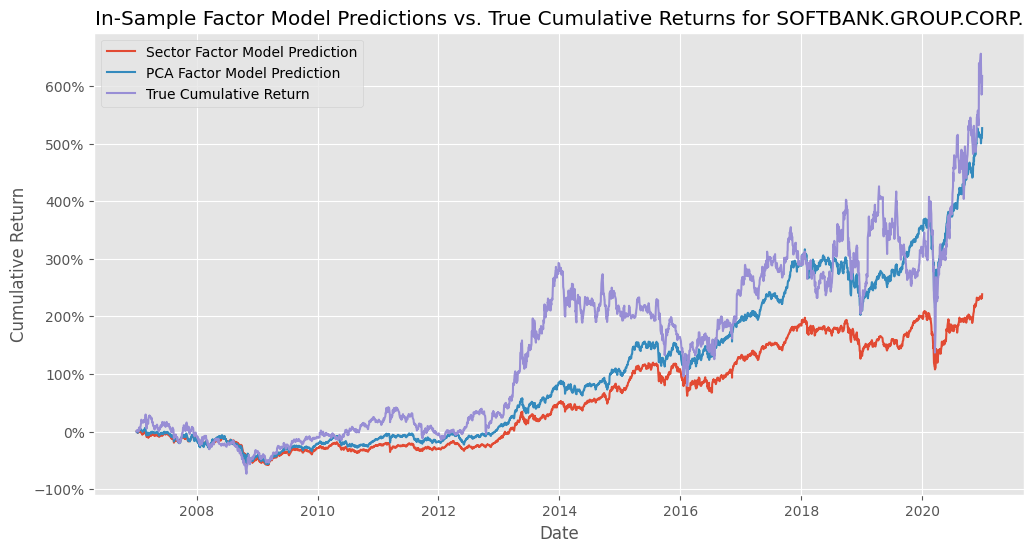

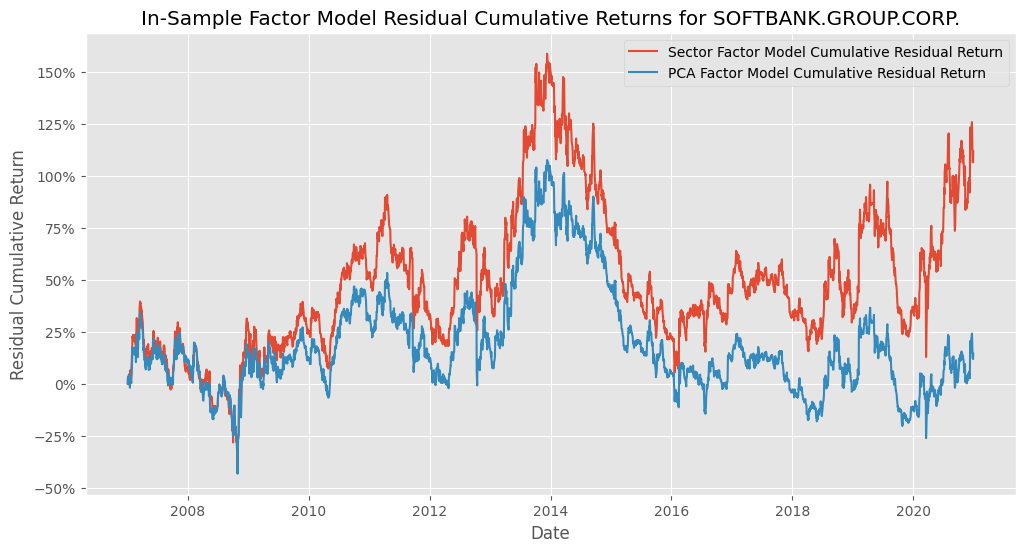

In [52]:
use_intercept = False

# Select the universe of assets to be used in the factor models
config = {
    'LOOKBACK_PERIOD': len(returns) - 1,
    'FILTER_MAX_ABS_RETURN': 0.5
}
valid_prices, valid_returns, valid_stocks = select_asset_universe(prices, returns, prices.index[-1], config)

# Fit the industry factor model and get residuals 
sector_factor_model = NikkeiSectorFactorModel(metadata, intercept=use_intercept)
sector_residuals, sector_predictions, sector_comp_mtx = sector_factor_model.fit(valid_returns)

# Fit the PCA factor model and get residuals
pca_factor_model = NikkeiPCAFactorModel(num_factors=6, intercept=use_intercept)
pca_residuals, pca_predictions, pca_comp_mtx = pca_factor_model.fit(valid_returns)

# Verify the correctness of the composition matrices
sector_comp_mtx_error = np.abs(valid_returns.values @ sector_comp_mtx - sector_residuals.values).sum().sum()
print(f"Sector composition matrix error (should be less than 1e-10): {sector_comp_mtx_error:0.2g}")
pca_comp_mtx_error = np.abs(valid_returns.values @ pca_comp_mtx - pca_residuals.values).sum().sum()
print(f"PCA composition matrix error (should be less than 1e-10): {pca_comp_mtx_error:0.2g}")

# Print MAE of predictions for each model
print(f'Sector Factor Model MAE: {(np.abs(valid_returns - sector_predictions) * (valid_returns != 0)).mean().mean():0.6f}')
print(f'PCA Factor Model MAE: {(np.abs(valid_returns - pca_predictions) * (valid_returns != 0)).mean().mean():0.6f}')

# Choose some asset to plot
ticker_to_plot = tickers[-1]  # softbank
company_name = metadata.loc[ticker_to_plot, 'Company']

# Plot the factor model predictions vs the actual cumulative returns for the ticker
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot((1 + sector_predictions[ticker_to_plot]).cumprod() - 1, label='Sector Factor Model Prediction')
    ax.plot((1 + pca_predictions[ticker_to_plot]).cumprod() - 1, label='PCA Factor Model Prediction')
    ax.plot((1 + valid_returns[ticker_to_plot]).cumprod() - 1, label='True Cumulative Return')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.title(f'In-Sample Factor Model Predictions vs. True Cumulative Returns for {company_name}')
    plt.legend()
    ax.yaxis.set_major_formatter(mpl_ticker.PercentFormatter(xmax=1))
    plt.show()

# Now plot the residuals of the factor models for the ticker
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot((1 + sector_residuals[ticker_to_plot]).cumprod() - 1, label='Sector Factor Model Cumulative Residual Return')
    ax.plot((1 + pca_residuals[ticker_to_plot]).cumprod() - 1, label='PCA Factor Model Cumulative Residual Return')
    plt.xlabel('Date')
    plt.ylabel('Residual Cumulative Return')
    plt.title(f'In-Sample Factor Model Residual Cumulative Returns for {company_name}')
    plt.legend()
    ax.yaxis.set_major_formatter(mpl_ticker.PercentFormatter(xmax=1))
    plt.show()

Now we'll plot the column sums of the composition matrices. These correspond to the dollar net exposure of each sector and PCA residual. We'll then plot the absolute column sums of the composition matrices. These correspond to the leverage of each sector and PCA residual.

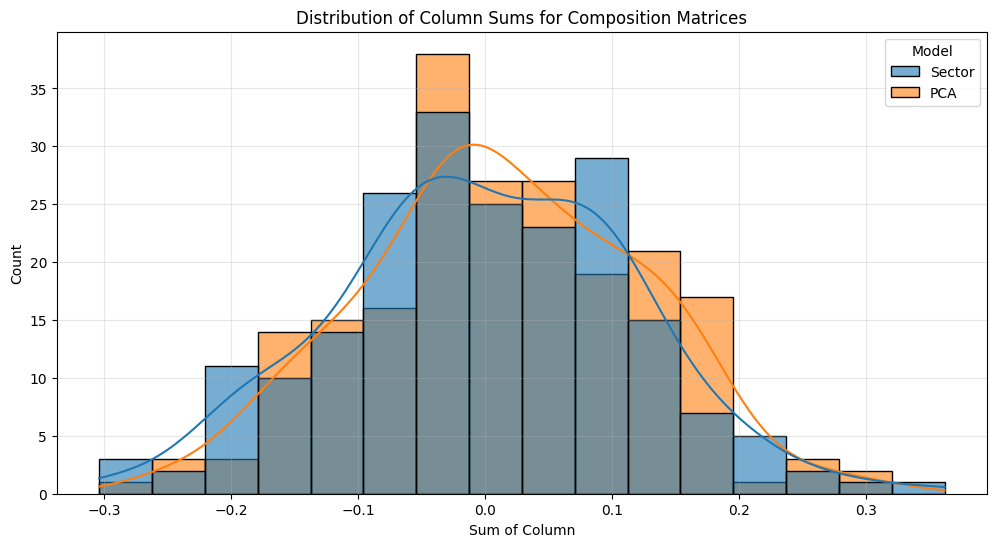

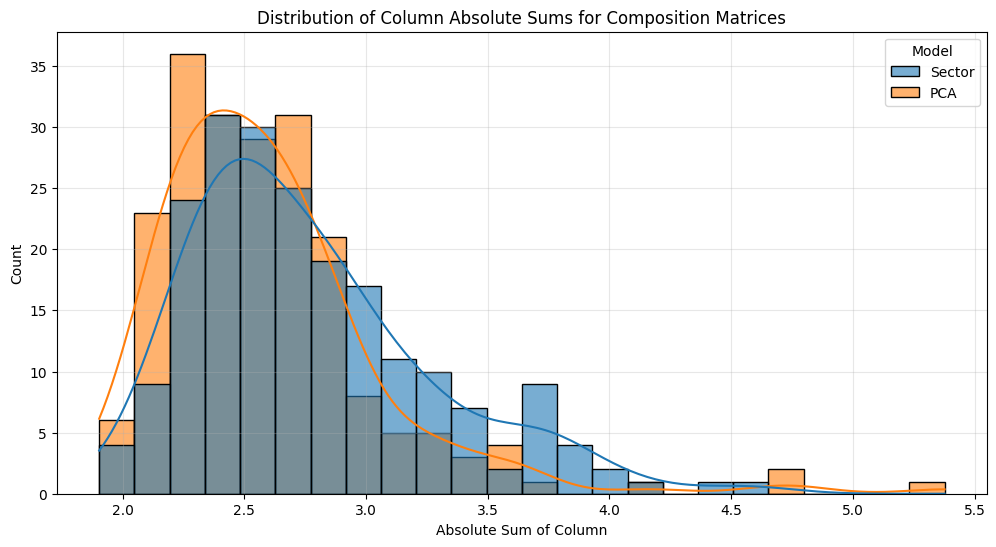

In [54]:
# Calculate column sums for both matrices
sector_sums = (sector_comp_mtx).sum(axis=0)
pca_sums = (pca_comp_mtx).sum(axis=0)

# Create a DataFrame for plotting
hist_data = pd.DataFrame({
    'Absolute Sum': np.concatenate([sector_sums, pca_sums]),
    'Model': ['Sector']*len(sector_sums) + ['PCA']*len(pca_sums)
})

# Plot histograms
plt.figure(figsize=(12, 6))
sns.histplot(data=hist_data, x='Absolute Sum', hue='Model', kde=True, alpha=0.6)
plt.title('Distribution of Column Sums for Composition Matrices')
plt.xlabel('Sum of Column')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.show()

# Calculate column sums for both matrices
sector_sums = np.abs(sector_comp_mtx).sum(axis=0)
pca_sums = np.abs(pca_comp_mtx).sum(axis=0)

# Create a DataFrame for plotting
hist_data = pd.DataFrame({
    'Absolute Sum': np.concatenate([sector_sums, pca_sums]),
    'Model': ['Sector']*len(sector_sums) + ['PCA']*len(pca_sums)
})

# Plot histograms
plt.figure(figsize=(12, 6))
sns.histplot(data=hist_data, x='Absolute Sum', hue='Model', kde=True, alpha=0.6)
plt.title('Distribution of Column Absolute Sums for Composition Matrices')
plt.xlabel('Absolute Sum of Column')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.show()

Finally, we'll explore a few questions. 

## Part 1

The sector factor model should in theory mostly residualize assets against other assets in the same sector or industry. Make a rough argument, supported by the data, about why this is or is not systematically true. 

One way to do this is the following:

1. Make a new dataframe from the absolute weights of the composition matrix and replace the index names and column names with the sector of each stock.
2. Sort the rows and columns by sector.
3. Set the diagonal entries of this dataframe to zero.
4. Make a heatmap of this dataframe using seaborn, with the sector names on the x and y axis (shown appropriately, i.e. one sector name label for the entire block of sector weights).
5. (Optional) Add dashed lines to mark the boundaries between different sectors. This produces a nice Mondrian-esque heatmap that makes it easier to delineate the sectors.

If the sector factor model does indeed mostly residualize assets against other assets in the same sector or industry, then the heatmap should look somewhat block-diagonal (with a fair bit of noise), where each block corresponds to a different sector.

Make sure to use the `valid_returns` throughout, and only take the sectors from the metadata for the stocks in the `valid_stocks`.

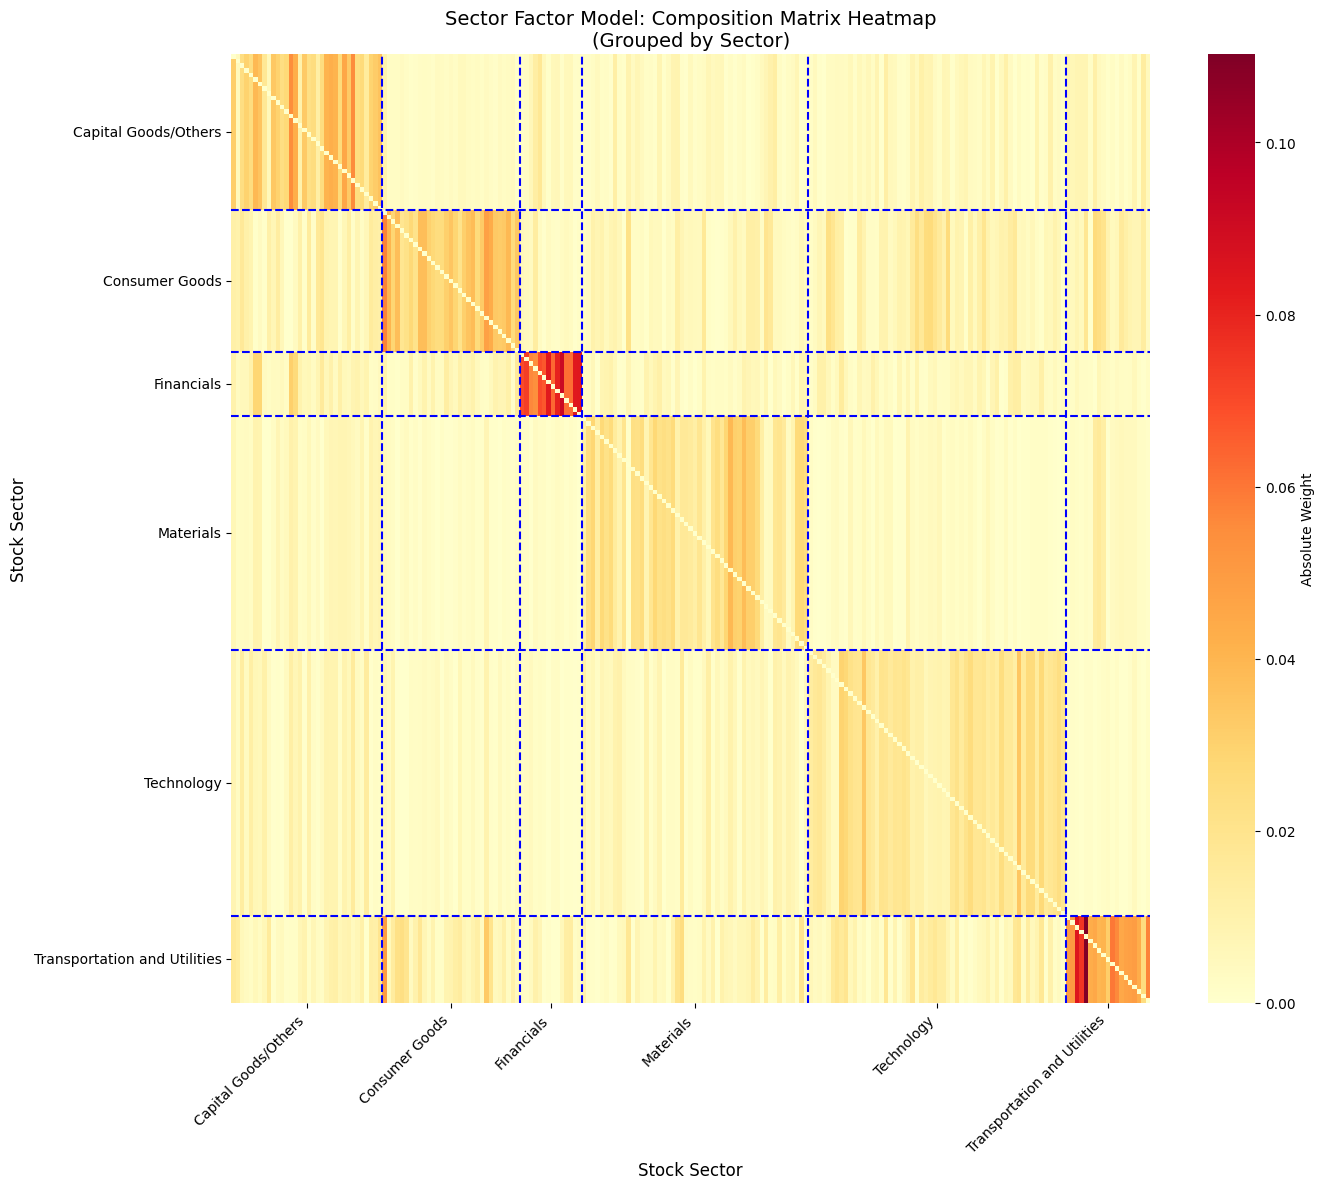

Analysis:
--------------------------------------------------
Average within-sector weight: 0.023838
Average cross-sector weight: 0.005000
Ratio (within/cross): 4.77


In [58]:
# Begin your answer here; Feel free to add code and markdown cells as needed.

# absolute values of composition matrix
abs_comp_mtx = sector_comp_mtx.abs()

# sector information for valid stocks
valid_metadata = metadata.loc[valid_stocks]
stock_sectors = valid_metadata['Sector']

# DataFrame with sector info and sort by sector
sector_order_df = pd.DataFrame({
    'ticker': valid_stocks,
    'sector': stock_sectors
}).sort_values('sector')

# sorted ticker order
sorted_tickers = sector_order_df['ticker'].values

# Reorder the composition matrix
sector_comp = abs_comp_mtx.loc[sorted_tickers, sorted_tickers].copy()

sector_comp.index = sector_order_df['sector'].values
sector_comp.columns = sector_order_df['sector'].values

# Set diagonal to zero
np.fill_diagonal(sector_comp.values, 0)

# heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(sector_comp, cmap='YlOrRd', cbar_kws={'label': 'Absolute Weight'})

# Boundary lines
sectors_sorted = sorted(stock_sectors.unique())
boundaries = []
current_pos = 0
for sector in sectors_sorted:
    count = (sector_order_df['sector'] == sector).sum()
    current_pos += count
    boundaries.append(current_pos)

# Draw boundary lines
for boundary in boundaries[:-1]:  # Skip the last one
    plt.axhline(y=boundary, color='blue', linestyle='--', linewidth=1.5)
    plt.axvline(x=boundary, color='blue', linestyle='--', linewidth=1.5)

plt.title('Sector Factor Model: Composition Matrix Heatmap\n(Grouped by Sector)', 
          fontsize=14)
plt.xlabel('Stock Sector', fontsize=12)
plt.ylabel('Stock Sector', fontsize=12)

tick_positions = []
tick_labels = []
current_pos = 0
for sector in sectors_sorted:
    count = (sector_order_df['sector'] == sector).sum()
    tick_positions.append(current_pos + count/2)
    tick_labels.append(sector)
    current_pos += count

plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')
plt.yticks(tick_positions, tick_labels, rotation=0)

plt.tight_layout()
plt.show()

# Analysis
print("Analysis:")
print("-" * 50)

# Calculate average weights within same sector vs across different sectors
same_sector_weights = []
diff_sector_weights = []

for i, sector_i in enumerate(stock_sectors):
    for j, sector_j in enumerate(stock_sectors):
        if i != j:  # Exclude diagonal
            weight = abs_comp_mtx.iloc[i, j]
            if sector_i == sector_j:
                same_sector_weights.append(weight)
            else:
                diff_sector_weights.append(weight)

avg_same = np.mean(same_sector_weights)
avg_diff = np.mean(diff_sector_weights)

print(f"Average within-sector weight: {avg_same:.6f}")
print(f"Average cross-sector weight: {avg_diff:.6f}")
print(f"Ratio (within/cross): {avg_same/avg_diff:.2f}")

**Explanation：** <br>
Based on the provided output and analysis, the sector factor model does systematically residualize assets primarily against other assets in the same sector, as theoretically expected.

The sector-sorted heatmap of the composition matrix exhibits a clear block-diagonal pattern: regions corresponding to pairs of stocks within the same sector appear substantially darker than off-block regions that correspond to cross-sector pairs. This visual structure suggests that, under the sector factor model, an asset’s residual is primarily constructed using other assets from the same sector rather than from different industries.

This qualitative observation is strongly supported by the quantitative evidence. After taking absolute weights, the average within-sector weight is approximately 0.0238, whereas the average cross-sector weight is only about 0.0050, yielding a ratio of roughly 4.77. This large gap indicates that the residual portfolios place substantially more weight on same-sector assets than on assets from other sectors.

Taken together, both the block-diagonal structure in the heatmap and the large within-to-cross sector weight ratio provide strong evidence that the sector factor model systematically residualizes assets primarily within their own sectors, which is consistent with the theoretical motivation of sector-based factor models.

## Part 2

Although the factors of the PCA factor model are often uninterpretable, the first few factors usually have some meaning. In fact, the first factor generally especially meaningful weights on the returns: it is usually said to approximate a broad market factor. In this case, we'll define "broad market factor" to be the equally-weighted index of (valid) returns. 

In this question, you'll provide some evidence for and extensions of this common observation. Do the following:
1. Examine the first factor of the PCA model and make an argument that it approximates the market factor. This argument can be made by comparisons with the factor time series, by examining the factor weights of the first factor (including how they relate to the metadata), or by some other means. Feel free to normalize the factor weights as you see fit.
2. Examine the second factor and third factor of the PCA model. Can you interpret them? Do they look like any particular time series? Do they load on specific industries or sectors? 

Make sure to use the `valid_returns` throughout.

Part 2.1: EVIDENCE THAT PC1 APPROXIMATES THE MARKET FACTOR

1. Correlation with market factor:
   Corr(PC1, Equal-Weighted Market) = 0.9981
   Interpretation: Very strong correlation - PC1 closely tracks the market


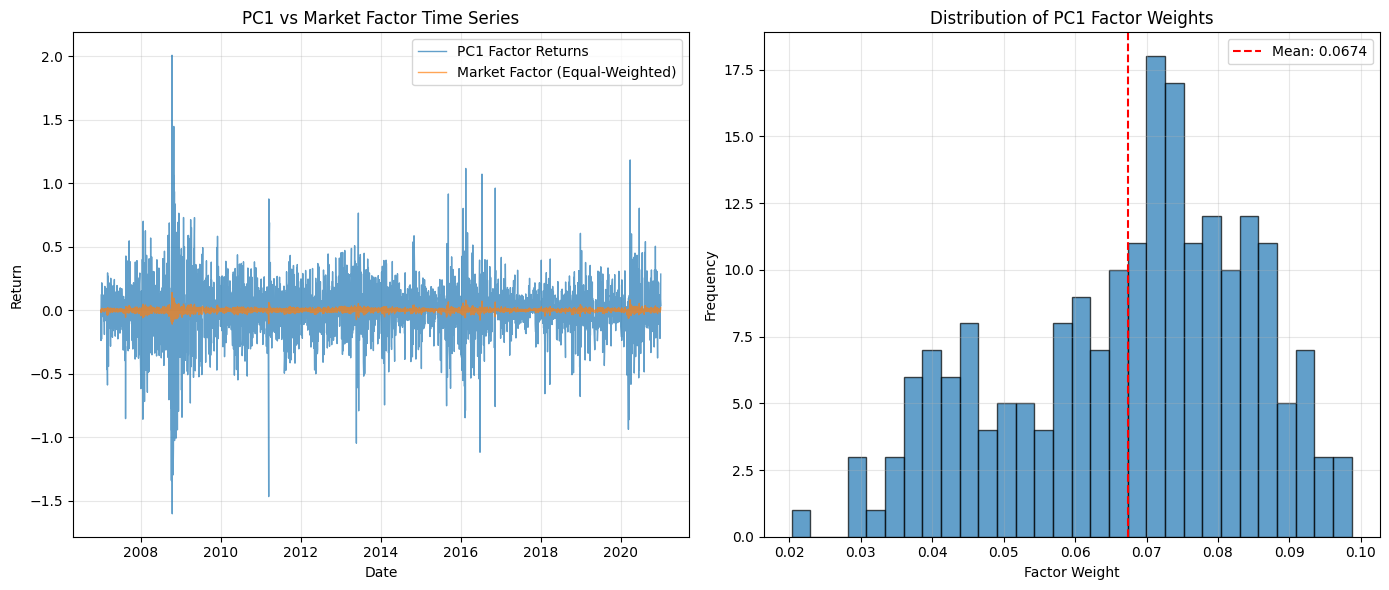


2. PC1 Factor Weights Characteristics:
   Mean weight: 0.067388
   Std of weights: 0.017065
   Proportion of positive weights: 100.00%
   Proportion of negative weights: 0.00%
   Interpretation: Most stocks have positive weights - characteristic of market factor

Part 2.2: INTERPRETATION OF PC2 AND PC3

ANALYSIS OF PC2

1. Correlation with Market: 0.0589
2. Weight Sign Distribution:
   Positive weights: 51.69%
   Negative weights: 48.31%

3. Sector Loading Patterns:
   Top 3 sectors with positive exposure:
     Financials               : +0.018030 (14 stocks)
     Transportation and Utilities: +0.083382 (19 stocks)
     Consumer Goods           : +0.088736 (31 stocks)

   Top 3 sectors with negative exposure:
     Materials                : -0.024438 (51 stocks)
     Technology               : -0.004322 (58 stocks)
     Capital Goods/Others     : -0.002667 (34 stocks)

4. Interpretation: Balanced long-short factor


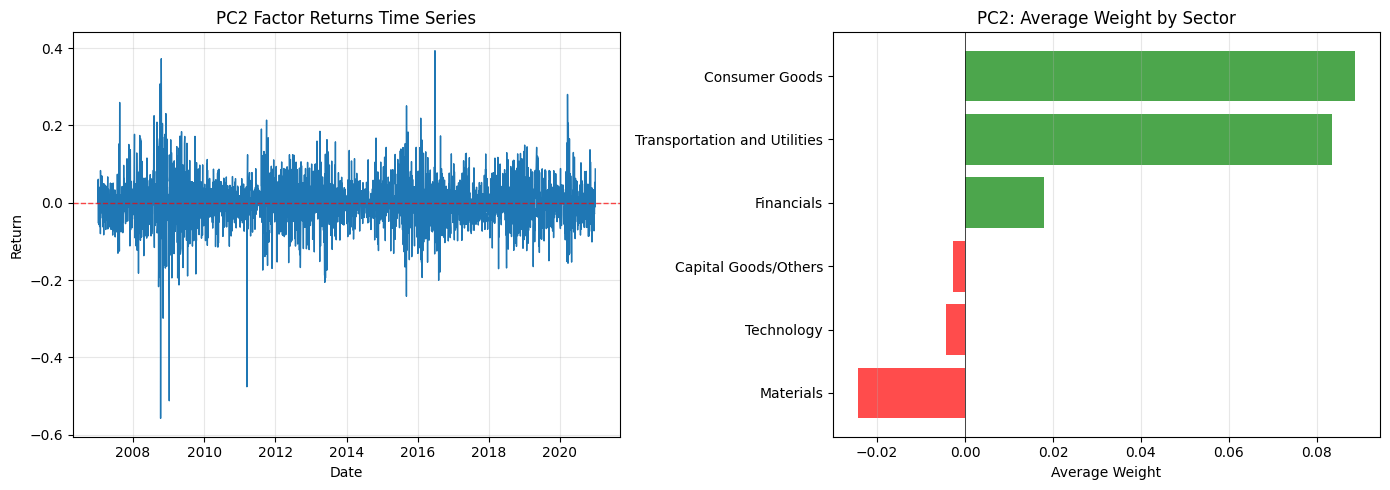


ANALYSIS OF PC3

1. Correlation with Market: 0.0051
2. Weight Sign Distribution:
   Positive weights: 56.52%
   Negative weights: 43.48%

3. Sector Loading Patterns:
   Top 3 sectors with positive exposure:
     Materials                : -0.007301 (51 stocks)
     Consumer Goods           : +0.032761 (31 stocks)
     Technology               : +0.051996 (58 stocks)

   Top 3 sectors with negative exposure:
     Financials               : -0.119658 (14 stocks)
     Transportation and Utilities: -0.032491 (19 stocks)
     Capital Goods/Others     : -0.029802 (34 stocks)

4. Interpretation: Balanced long-short factor


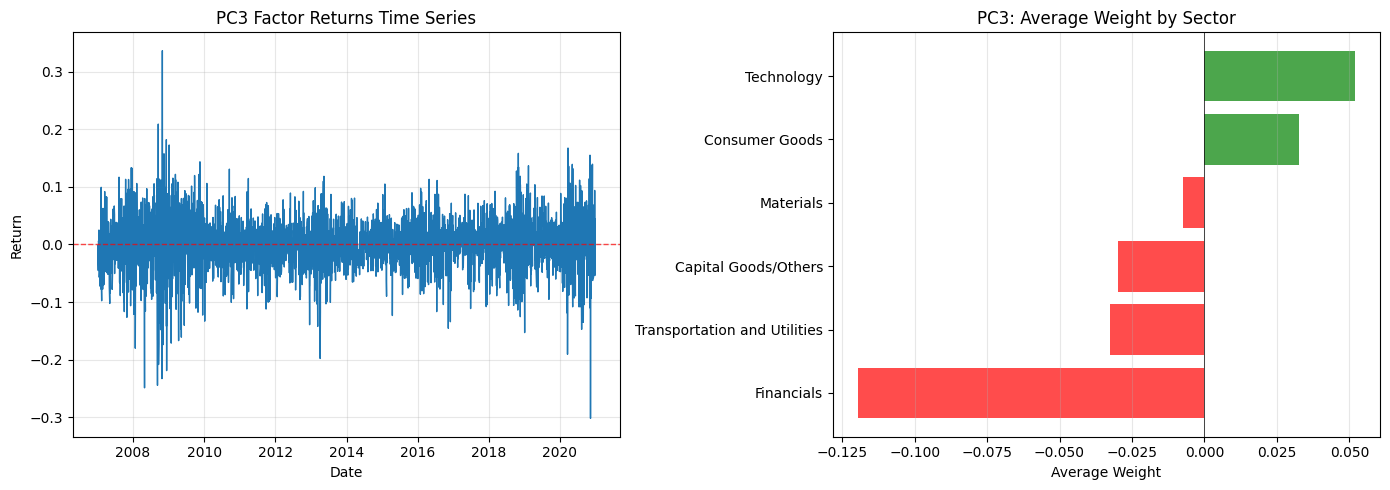

In [62]:
# Begin your answer here; Feel free to add code and markdown cells as needed.

R = valid_returns.copy()

tickers = R.columns
meta_valid = metadata.loc[tickers].copy()
sectors = meta_valid["Sector"]
mkt = R.mean(axis=1)

k = 3

X = R.values
X_centered = X - X.mean(axis=0, keepdims=True)
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

factor_weights = Vt[:k, :].T  # shape: (N, k)

factor_returns = X_centered @ factor_weights  # shape: (T, k)

factor_df = pd.DataFrame(factor_returns, index=R.index, 
                         columns=[f"PC{i+1}" for i in range(k)])
loading_df = pd.DataFrame(factor_weights, index=tickers, 
                          columns=[f"PC{i+1}" for i in range(k)])

# -----------------------------
# Part 2.1: Show PC1 approximates the market factor
# -----------------------------
pc1_returns = factor_df["PC1"]
pc1_loadings = loading_df["PC1"]

# Correlation between PC1 and equally-weighted market factor
corr_pc1_mkt = np.corrcoef(pc1_returns.values, mkt.values)[0, 1]
print("=" * 70)
print("Part 2.1: EVIDENCE THAT PC1 APPROXIMATES THE MARKET FACTOR")
print("=" * 70)
print(f"\n1. Correlation with market factor:")
print(f"   Corr(PC1, Equal-Weighted Market) = {corr_pc1_mkt:.4f}")

if corr_pc1_mkt > 0.7:
    corr_interpretation = "Very strong correlation - PC1 closely tracks the market"
elif corr_pc1_mkt > 0.5:
    corr_interpretation = "Strong correlation - PC1 represents market movement"
elif corr_pc1_mkt > 0.3:
    corr_interpretation = "Moderate correlation"
else:
    corr_interpretation = "Weak correlation - PC1 may not be a market factor"

print(f"   Interpretation: {corr_interpretation}")

# Visual 1: Factor time series comparison
plt.figure(figsize=(14, 6))

# Plot 1: Factor time series
plt.subplot(1, 2, 1)
plt.plot(pc1_returns.index, pc1_returns.values, 
         label="PC1 Factor Returns", alpha=0.7, linewidth=1)
plt.plot(mkt.index, mkt.values, 
         label="Market Factor (Equal-Weighted)", alpha=0.7, linewidth=1)
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('PC1 vs Market Factor Time Series')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Factor weights distribution
plt.subplot(1, 2, 2)
plt.hist(pc1_loadings, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Factor Weight')
plt.ylabel('Frequency')
plt.title('Distribution of PC1 Factor Weights')
plt.axvline(x=pc1_loadings.mean(), color='red', linestyle='--', 
            label=f'Mean: {pc1_loadings.mean():.4f}')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Additional statistics
print(f"\n2. PC1 Factor Weights Characteristics:")
print(f"   Mean weight: {pc1_loadings.mean():.6f}")
print(f"   Std of weights: {pc1_loadings.std():.6f}")

# Sign consistency analysis
positive_prop = (pc1_loadings > 0).mean()
negative_prop = (pc1_loadings < 0).mean()
print(f"   Proportion of positive weights: {positive_prop:.2%}")
print(f"   Proportion of negative weights: {negative_prop:.2%}")

if positive_prop > 0.7:
    sign_interpretation = "Most stocks have positive weights - characteristic of market factor"
elif negative_prop > 0.7:
    sign_interpretation = "Most stocks have negative weights - inverse market factor"
else:
    sign_interpretation = "Mixed signs - may not be pure market factor"

print(f"   Interpretation: {sign_interpretation}")

# -----------------------------
# Part 2.2: Interpret PC2 and PC3
# -----------------------------
print("\n" + "=" * 70)
print("Part 2.2: INTERPRETATION OF PC2 AND PC3")
print("=" * 70)

for pc_name in ["PC2", "PC3"]:
    pc_returns = factor_df[pc_name]
    pc_loadings = loading_df[pc_name]
    
    print(f"\n{'='*40}")
    print(f"ANALYSIS OF {pc_name}")
    print(f"{'='*40}")
    
    # Basic statistics
    corr_pc_mkt = np.corrcoef(pc_returns.values, mkt.values)[0, 1]
    print(f"\n1. Correlation with Market: {corr_pc_mkt:.4f}")
    
    # Weight sign distribution
    pos_prop = (pc_loadings > 0).mean()
    neg_prop = (pc_loadings < 0).mean()
    print(f"2. Weight Sign Distribution:")
    print(f"   Positive weights: {pos_prop:.2%}")
    print(f"   Negative weights: {neg_prop:.2%}")
    
    # Sector analysis
    pc_sector_avg = pd.DataFrame({
        'weight': pc_loadings,
        'sector': sectors
    }).groupby('sector')['weight'].mean().sort_values()
    
    print(f"\n3. Sector Loading Patterns:")
    print(f"   Top 3 sectors with positive exposure:")
    for sector in pc_sector_avg.tail(3).index:
        weight = pc_sector_avg[sector]
        count = (sectors == sector).sum()
        print(f"     {sector:25s}: {weight:+.6f} ({count} stocks)")
    
    print(f"\n   Top 3 sectors with negative exposure:")
    for sector in pc_sector_avg.head(3).index:
        weight = pc_sector_avg[sector]
        count = (sectors == sector).sum()
        print(f"     {sector:25s}: {weight:+.6f} ({count} stocks)")
    
    # Factor type interpretation
    if pos_prop > 0.7:
        factor_type = "Predominantly long factor"
    elif neg_prop > 0.7:
        factor_type = "Predominantly short factor"
    elif abs(pos_prop - neg_prop) < 0.15:
        factor_type = "Balanced long-short factor"
    else:
        factor_type = "Tilted long-short factor"
    
    print(f"\n4. Interpretation: {factor_type}")

    # Visualizations for PC2 and PC3
    plt.figure(figsize=(14, 5))
    
    # Subplot 1: Factor time series
    plt.subplot(1, 2, 1)
    plt.plot(pc_returns, linewidth=1)
    plt.axhline(y=pc_returns.mean(), color='red', linestyle='--', alpha=0.7, linewidth=1)
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.title(f'{pc_name} Factor Returns Time Series')
    plt.grid(alpha=0.3)
    
    # Subplot 2: Sector average weights
    plt.subplot(1, 2, 2)
    colors = ['green' if x > 0 else 'red' for x in pc_sector_avg.values]
    plt.barh(range(len(pc_sector_avg)), pc_sector_avg.values, color=colors, alpha=0.7)
    plt.yticks(range(len(pc_sector_avg)), pc_sector_avg.index)
    plt.xlabel('Average Weight')
    plt.title(f'{pc_name}: Average Weight by Sector')
    plt.axvline(x=0, color='black', linewidth=0.5)
    plt.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

**Explanation：** <br>
**First PCA Factor**<br>
The first PCA factor closely approximates the market factor. Its correlation with the equally weighted market return is 0.9981, indicating almost perfect co-movement. The time-series plots show near-identical dynamics over the sample. Cross-sectionally, 100% of stocks load positively on PC1, with a mean weight of 0.067, consistent with a common market component affecting nearly all assets rather than any single sector. These results strongly support interpreting the first principal component as the broad market factor.

**Second and Third PCA Factors**<br>
PC2 and PC3 are largely orthogonal to the market, with correlations of 0.0589 and 0.0051, respectively. Their loadings are roughly balanced between positive and negative weights, forming long-short structures. PC2 loads positively on Consumer Goods, Transportation and Utilities, and Financials, and negatively on Materials, Technology, and Capital Goods. PC3 loads positively on Technology and Consumer Goods and strongly negatively on Financials and Transportation. Their return series fluctuate around 0, indicating sector-rotation or relative-value factors rather than market-wide risk.

# Question 6 (extra credit)

(0.25 bonus points)

One interesting question to explore is to try to identify which factor model produces residuals with stronger mean-reversion. In this question, we'll explore this. 

To help you out, we've implemented a class which performs an ADF test on each residual passed in.

In [67]:
class NikkeiADFTest():
    def __init__(self, prices: pd.DataFrame):
        self.prices = prices
        
    def test(self) -> pd.DataFrame:
        results = []
        if isinstance(self.prices, pd.Series):
            adf = arch.unitroot.ADF(self.prices)
            results.append({'ADF Statistic': adf.stat, 'P-Value': adf.pvalue})
        elif isinstance(self.prices, pd.DataFrame):
            for col in self.prices.columns:
                adf = arch.unitroot.ADF(self.prices[col])
                results.append({'Stock': col, 'ADF Statistic': adf.stat, 'P-Value': adf.pvalue})
        else:
            raise ValueError('Input must be a pandas Series or DataFrame')
        return pd.DataFrame(results)

Test the normalized residual prices (i.e. the cumulative residual return) of each of the residuals from the sector factor model and from the PCA factor model. Concatenate and compare the results. Which factor model produces more significantly mean-reverting residuals at a significant level of 0.05? You may plot an overlaid histogram of each of the sets of p-values if you like. (Note that we do not correct for multiple testing here, but that could potentially be a good idea in a real analysis.)

One interesting thing to explore here might be to see if the intercept term in the factor model makes a difference in the results. If you did the extra credit, you can test this as well below (though this is not required for the extra credit).

Make sure to use the `valid_returns` throughout.

ADF Mean-Reversion Comparison (alpha = 0.05)
Sector model: n=207, p<0.05 = 31 (14.98%)
PCA model:    n=207, p<0.05 = 38 (18.36%)

Conclusion: PCA factor model produces more significantly mean-reverting residuals (by ADF p-values).


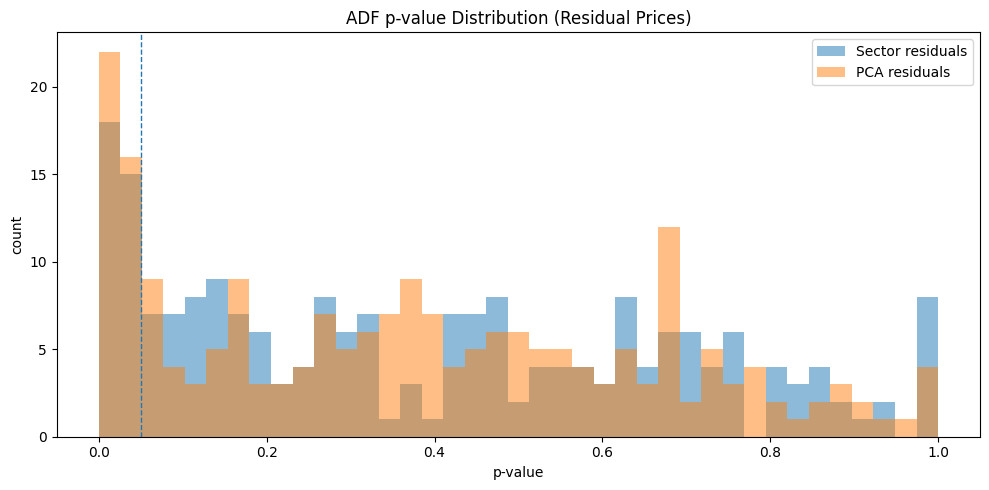


Top mean-reverting residuals by model (smallest p-values):

Sector model (smallest p-values):
6504.T    9.0752e-05
8267.T    1.0523e-04
1808.T    2.3334e-04
6857.T    3.0413e-04
3401.T    4.2313e-04
4043.T    6.8766e-04
6952.T    1.3325e-03
9735.T    2.5126e-03
6113.T    3.9949e-03
8058.T    5.9784e-03
Name: P-Value, dtype: float64

PCA model (smallest p-values):
4043.T    0.0002
6504.T    0.0002
6857.T    0.0004
1808.T    0.0004
3401.T    0.0006
8267.T    0.0009
6503.T    0.0010
5706.T    0.0013
6841.T    0.0072
5332.T    0.0074
Name: P-Value, dtype: float64


In [81]:
# Begin your answer here; Feel free to add code and markdown cells as needed.

def extract_residuals(model, valid_returns: pd.DataFrame) -> pd.DataFrame:
    candidate_attrs = ["residuals", "resid", "eps", "idiosyncratic", "idiosyncratic_returns"]

    for attr in candidate_attrs:
        if hasattr(model, attr):
            resid = getattr(model, attr)

            if isinstance(resid, pd.DataFrame):
                residuals = resid.copy()
            elif isinstance(resid, np.ndarray):
                residuals = pd.DataFrame(resid, index=valid_returns.index, columns=valid_returns.columns)
            else:
                continue

            residuals = residuals.reindex(index=valid_returns.index, columns=valid_returns.columns)
            return residuals

def residual_prices_from_returns(resid_returns: pd.DataFrame) -> pd.DataFrame:
    rr = resid_returns.fillna(0.0)
    return (1.0 + rr).cumprod(axis=0)


def adf_pvalues(resid_prices: pd.DataFrame) -> pd.Series:
    tester = NikkeiADFTest(resid_prices)
    res = tester.test()
    if "Stock" in res.columns:
        pvals = res.set_index("Stock")["P-Value"]
    else:
        pvals = pd.Series(res["P-Value"].values, index=resid_prices.columns)
    return pvals.reindex(resid_prices.columns)


def summarize_pvalues(pvals: pd.Series, alpha: float = 0.05) -> dict:
    total = int(pvals.notna().sum())
    sig = int((pvals < alpha).sum())
    frac = sig / total if total > 0 else np.nan
    return {"n_total": total, "n_sig": sig, "frac_sig": frac}


# Get residual returns for both models
sector_resid_returns = extract_residuals(sector_factor_model, valid_returns)
pca_resid_returns    = extract_residuals(pca_factor_model, valid_returns)

# Convert residual returns to normalized residual prices
sector_resid_prices = residual_prices_from_returns(sector_resid_returns)
pca_resid_prices    = residual_prices_from_returns(pca_resid_returns)

# Run ADF tests and collect p-values
sector_pvals = adf_pvalues(sector_resid_prices)
pca_pvals    = adf_pvalues(pca_resid_prices)

# Concatenate into one DataFrame for convenience
pvals_df = pd.DataFrame({
    "sector_pval": sector_pvals,
    "pca_pval": pca_pvals})


# Compare significance at alpha = 0.05
alpha = 0.05
sector_summary = summarize_pvalues(sector_pvals, alpha=alpha)
pca_summary    = summarize_pvalues(pca_pvals, alpha=alpha)

print("=" * 70)
print("ADF Mean-Reversion Comparison (alpha = 0.05)")
print("=" * 70)
print(f"Sector model: n={sector_summary['n_total']}, p<0.05 = {sector_summary['n_sig']} "
      f"({sector_summary['frac_sig']*100:.2f}%)")
print(f"PCA model:    n={pca_summary['n_total']}, p<0.05 = {pca_summary['n_sig']} "
      f"({pca_summary['frac_sig']*100:.2f}%)")

if sector_summary["frac_sig"] > pca_summary["frac_sig"]:
    print("\nConclusion: Sector factor model produces more significantly mean-reverting residuals (by ADF p-values).")
elif sector_summary["frac_sig"] < pca_summary["frac_sig"]:
    print("\nConclusion: PCA factor model produces more significantly mean-reverting residuals (by ADF p-values).")
else:
    print("\nConclusion: Both models show similar mean-reversion rates at the 0.05 level.")

# overlayed p-value histograms
plt.figure(figsize=(10, 5))

# Use the same bins for fair comparison
bins = np.linspace(0, 1, 40)

plt.hist(sector_pvals.dropna(), bins=bins, alpha=0.5, label="Sector residuals")
plt.hist(pca_pvals.dropna(), bins=bins, alpha=0.5, label="PCA residuals")

plt.axvline(alpha, linestyle="--", linewidth=1)
plt.title("ADF p-value Distribution (Residual Prices)")
plt.xlabel("p-value")
plt.ylabel("count")
plt.legend()
plt.tight_layout()
plt.show()

# table of the most mean-reverting residuals
top_k = 10
print("\nTop mean-reverting residuals by model (smallest p-values):")
print("\nSector model (smallest p-values):")
print(sector_pvals.sort_values().head(top_k))

print("\nPCA model (smallest p-values):")
print(pca_pvals.sort_values().head(top_k))

**Explanation：** <br>Using ADF tests on normalized residual price series constructed from valid_returns, I compare the mean-reversion strength of residuals from the sector and PCA factor models.

At the 5% significance level, the sector model produces 31 significant residuals out of 207 assets (14.98%), while the PCA model produces 38 out of 207 (18.36%). Thus, the PCA factor model yields a higher fraction of statistically mean-reverting residuals.

The overlaid p-value histogram further supports this conclusion, as the PCA distribution shows more mass below 0.05. The lists of smallest p-values also indicate that PCA residuals achieve equally low or lower values across more assets.

Based on ADF tests and p-value distributions, the PCA factor model generates more strongly mean-reverting residuals than the sector factor model.